In [12]:
import numpy as np
import pandas as pd
import datetime as dt
import yfinance as yf

years = 15

endDate = dt.datetime.now()
startDate = endDate - dt.timedelta(days=365*years)

In [13]:
portfolio = {
  "portfolio": [

    {"symbol": "NVDA", "totalValue": 1000, "percentageOfPortfolio": 12.5},
    {"symbol": "AMD", "totalValue": 1000, "percentageOfPortfolio": 12.5},
    {"symbol": "META", "totalValue": 1000, "percentageOfPortfolio": 12.5},
    {"symbol": "GOOGL", "totalValue": 1000, "percentageOfPortfolio": 12.5},
    {"symbol": "TSLA", "totalValue": 1000, "percentageOfPortfolio": 12.5},
    {"symbol": "AMZN", "totalValue": 1000, "percentageOfPortfolio": 12.5},
    {"symbol": "MSFT", "totalValue": 1000, "percentageOfPortfolio": 12.5},
    {"symbol": "FSLY", "totalValue": 1000, "percentageOfPortfolio": 12.5}
  ]
}


# Extract symbols into a list
symbols = [entry["symbol"] for entry in portfolio["portfolio"]]

print(symbols)

['NVDA', 'AMD', 'META', 'GOOGL', 'TSLA', 'AMZN', 'MSFT', 'FSLY']


In [14]:
tickers = symbols

In [15]:
### Download the daily adjusted close prices for the tickers
adj_close_df = pd.DataFrame()

for ticker in tickers:
    data = yf.download(ticker, start = startDate, end = endDate)
    adj_close_df[ticker] = data['Adj Close']

print(adj_close_df)

### Calculate the daily log returns and drop any NAs
log_returns = np.log(adj_close_df/adj_close_df.shift(1))
log_returns  = log_returns.dropna()

print(log_returns)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

                  NVDA         AMD        META       GOOGL        TSLA  \
Date                                                                     
2009-02-25    1.834690    2.220000         NaN    8.549550         NaN   
2009-02-26    1.894317    2.090000         NaN    8.437938         NaN   
2009-02-27    1.898905    2.180000         NaN    8.458208         NaN   
2009-03-02    1.738369    2.010000         NaN    8.187187         NaN   
2009-03-03    1.807170    2.070000         NaN    8.145145         NaN   
...                ...         ...         ...         ...         ...   
2024-02-14  739.000000  178.699997  472.778381  145.940002  188.710007   
2024-02-15  726.580017  176.759995  483.516968  142.770004  200.449997   
2024-02-16  726.130005  173.869995  472.818329  140.520004  199.949997   
2024-02-20  694.520020  165.690002  471.250000  141.119995  193.759995   
2024-02-21  674.719971  164.289993  468.029999  142.550003  194.770004   

                  AMZN        MSFT   

In [16]:
### Create a function that will be used to calculate portfolio expected return
def expected_return(weights, log_returns):
    return np.sum(log_returns.mean()*weights)

### Create a function that will be used to calculate portfolio standard deviation
def standard_deviation (weights, cov_matrix):
    variance = weights.T @ cov_matrix @ weights
    return np.sqrt(variance)

In [17]:
### Create a covariance matrix for all the securities
cov_matrix = log_returns.cov()
print(cov_matrix)

           NVDA       AMD      META     GOOGL      TSLA      AMZN      MSFT  \
NVDA   0.001053  0.000822  0.000516  0.000424  0.000688  0.000447  0.000456   
AMD    0.000822  0.001091  0.000470  0.000385  0.000626  0.000427  0.000405   
META   0.000516  0.000470  0.000822  0.000380  0.000417  0.000398  0.000344   
GOOGL  0.000424  0.000385  0.000380  0.000411  0.000346  0.000300  0.000302   
TSLA   0.000688  0.000626  0.000417  0.000346  0.001694  0.000409  0.000375   
AMZN   0.000447  0.000427  0.000398  0.000300  0.000409  0.000503  0.000298   
MSFT   0.000456  0.000405  0.000344  0.000302  0.000375  0.000298  0.000376   
FSLY   0.000793  0.000718  0.000561  0.000402  0.000833  0.000523  0.000423   

           FSLY  
NVDA   0.000793  
AMD    0.000718  
META   0.000561  
GOOGL  0.000402  
TSLA   0.000833  
AMZN   0.000523  
MSFT   0.000423  
FSLY   0.003024  


In [18]:

# Calculate total portfolio value
portfolio_value = sum(item["totalValue"] for item in portfolio["portfolio"])
print(f"Total Portfolio Value: {portfolio_value} GBP")
weights = np.array([entry["percentageOfPortfolio"] for entry in portfolio["portfolio"]])

# Since weights are in percentages, convert them to fractions by dividing by 100
weights = weights / 100

print(weights)

portfolio_expected_return = expected_return(weights, log_returns)
portfolio_std_dev = standard_deviation (weights, cov_matrix)

Total Portfolio Value: 8000 GBP
[0.125 0.125 0.125 0.125 0.125 0.125 0.125 0.125]


In [19]:
def random_z_score():
    return np.random.normal(0, 1)

### Create a function to calculate scenarioGainLoss
days = 20

def scenario_gain_loss(portfolio_value, portfolio_std_dev, z_score, days):
    return portfolio_value * portfolio_expected_return * days + portfolio_value * portfolio_std_dev * z_score * np.sqrt(days)

In [20]:
### Run 10000 simulations
simulations = 10000
scenarioReturn = []

for i in range(simulations):
    z_score = random_z_score()
    scenarioReturn.append(scenario_gain_loss(portfolio_value, portfolio_std_dev, z_score, days))

In [21]:
### Specify a confidence interval and calculate the Value at Risk (VaR)
confidence_interval = 0.99
VaR = -np.percentile(scenarioReturn, 100 * (1 - confidence_interval))
print(VaR)

1851.7298590115856


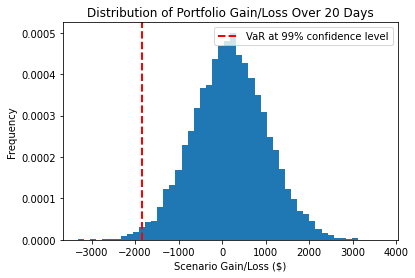

In [22]:
### Plot the results of all 10000 scenarios
import matplotlib.pyplot as plt
plt.hist(scenarioReturn, bins=50, density=True)
plt.xlabel('Scenario Gain/Loss ($)')
plt.ylabel('Frequency')
plt.title(f'Distribution of Portfolio Gain/Loss Over {days} Days')
plt.axvline(-VaR, color='r', linestyle='dashed', linewidth=2, label=f'VaR at {confidence_interval:.0%} confidence level')
plt.legend()
plt.show()